<a href="https://colab.research.google.com/github/guilhermecarva/guilhermecarva/blob/main/Clusterizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br><br>

## Exercício clusterização: clusters RFM

<br>

No exercício a seguir, estudaremos um conceito muito interessante e comum no contexto de dados, os __clusters RFM!__

A sigla __RFM__ vem do inglês, significando __recency, frequency and monetary.__ Em português, recência, frequência e valor monetário.

Essa clusterização é muito comum quando o __objetivo é segmentar clientes de uma certa base__ em termos de:

<br>

__Recência__ de compra: há quantos dias foi feita a última compra, relativo a data atual;

__Freqûencia__ de compra: considerando uma certa janela de tempo, qual a frequência (ou quantidade) de compra;

__Valor monetário__ das compras: qual foi o total gasto, nesta mesma janela de tempo.


<br>

Use a função getData para carregar os dados disponíveis para este exercício.

Esse dataset contém 4 colunas, em que cada linha/istância corresponde a um cliente único de uma certa empresa.

As colunas "rec", "freq" e "valor" indicam a recência, frequência e valor monetário do cliente num período de 120 dias.

Desta forma, por exemplo, um usuário com:

    - recência: 30
    
    - frequência: 5
    
    - valor: 10
    
deve ser interpretado como: um usuário que fez a última compra há 30 dias atrás; que a frequência mensal de compra dele, dentro dos últimos 120 dias foi de 5 vezes; o valor médio gasto, dentro desse período de 120 dias, foi de R$10,00.

<br>

__Exercício:__

Como cientista de dados da empresa, o seu __objetivo__ é __analisar os dados disponíveis__ e procurar pelos __grupos de clientes mais valiosos e menos valiosos__ para a companhia.

Justifique bastante suas análises e __interprete os resultados.__

Você pode (e deve!) utilizar técnicas de clusterização, como __KMeans__ e __DBSCAN__, bem como criar segmentações a partir de suas __análises exploratórias.__

Lembre-se que, neste contexto não supervisionado, não existe resposta certa e a __criatividade__ é fundamental!

__Obs.:__ Ao utilizar o KMeans e o DBSCAN, lembre-se de normalizar os dados antes de aplicar os algoritmos.

__========================================================================================================__

__Importando as bibliotécas que utilizaremos neste exercício, bem como o DataSet disponibilizado (RFM)__


In [ ]:
pip install -U threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

def getData():
    return pd.read_csv("dataframe_exercicio_clusterizacao_RFM.csv")

In [ ]:
df = getData()
df

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067
...,...,...,...,...
1007,1008,50.0,6.0,116.867455
1008,1009,72.0,4.0,94.807854
1009,1010,50.0,5.0,99.187523
1010,1011,81.0,2.0,66.581900


__Precisaremos normalizas os dados__

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(df.values[:, 1:])

In [ ]:
X

array([[-1.13629794,  1.02184116,  0.69876646],
       [ 0.22434648,  0.60902549,  0.42288301],
       [ 1.32042115,  0.19620982,  0.56493584],
       ...,
       [ 0.1865508 ,  0.19620982, -0.0830832 ],
       [ 1.35821683, -1.04223719, -0.34402889],
       [-0.53156708, -1.04223719,  0.15702255]])

### Vamos plotar em gráficos utilizando o scatter para melhor visualização dos dados

C:\Users\guilh\anaconda3\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


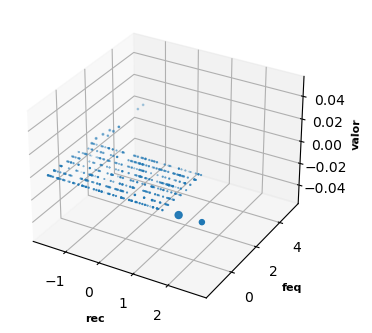

In [ ]:
plt.figure(figsize=[4,4]).add_subplot(projection='3d').set_zlabel('valor', fontsize = 8, fontweight = 'bold')
plt.scatter(X[:,0], X[:, 1], X[:,2])
#plt.scatter(df.rec, df.freq, df.valor, marker='.')
plt.xlabel("rec", fontsize = 8, fontweight = 'bold')
plt.ylabel("feq", fontsize = 8, fontweight = 'bold')
plt.grid()
plt.show()

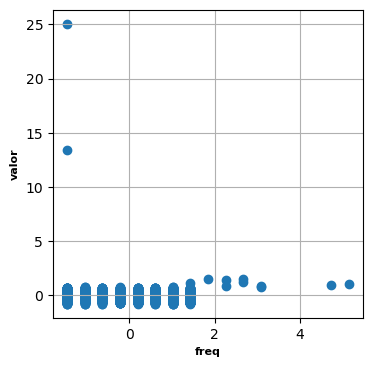

In [ ]:
plt.figure(figsize=[4,4])
plt.scatter(X[:, 1], X[:,2])
plt.xlabel("freq", fontsize = 8, fontweight = 'bold')
plt.ylabel("valor", fontsize = 8, fontweight = 'bold')
plt.grid()
plt.show()

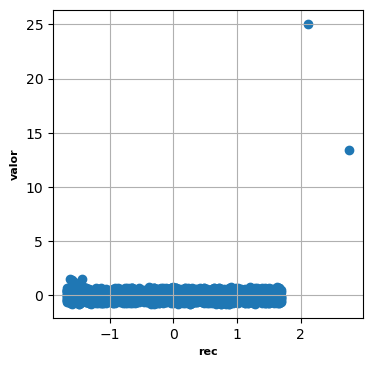

In [ ]:
plt.figure(figsize=[4,4])
plt.scatter(X[:, 0], X[:,2])
plt.xlabel("rec", fontsize = 8, fontweight = 'bold')
plt.ylabel("valor", fontsize = 8, fontweight = 'bold')
plt.grid()
plt.show()

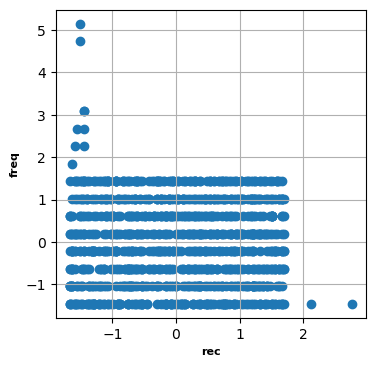

In [ ]:
plt.figure(figsize=[4,4])
plt.scatter(X[:, 0], X[:,1])
plt.xlabel("rec", fontsize = 8, fontweight = 'bold')
plt.ylabel("freq", fontsize = 8, fontweight = 'bold')
plt.grid()
plt.show()

In [ ]:
df.iloc[:,1:].corr()

,rec,freq,valor
rec,1.000000,-0.019119,0.09011
freq,-0.019119,1.000000,-0.06169
valor,0.090110,-0.061690,1.00000


### Podemos concluir pelos gráficos acima que o valor não possui grande dispersão, não me parece fazer sentido clusterizá-lo. Vemos também que a correlação entre as variáveis é muito pequena. Portanto levaremos em consideração apenas a disperção das variáveis e iremos clusterizar apenas as variáveis rec e freq. E após agrupá-los poderemos tentar verificar qual grupo é o mais valioso.
### Outra observação que tivemos, é que temos alguns outlier. Vamos eliminá-los antes de continuar.
### Como temos poucos outliers e são facilmente identificados visualmente, iremos apenas filtrar por valores.

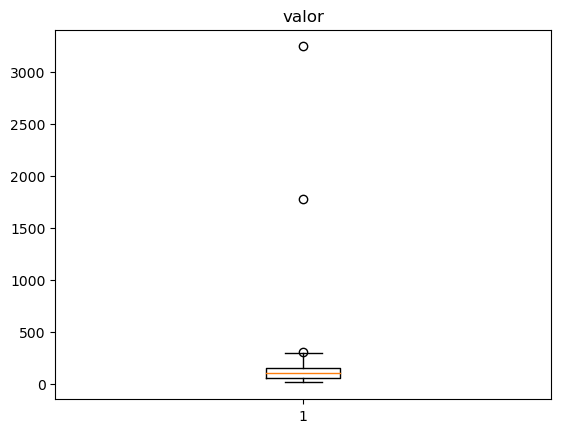

In [ ]:
plt.boxplot(df.valor)
plt.title('valor')
plt.show()

In [ ]:
df.shape

(1012, 4)

In [ ]:
df = df[df['valor']<1000]

In [ ]:
df.shape

(1010, 4)

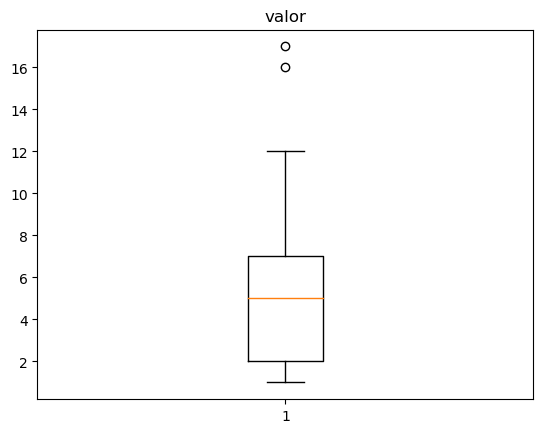

In [ ]:
plt.boxplot(df.freq)
plt.title('valor')
plt.show()

In [ ]:
df = df[df['freq']<14]

In [ ]:
df.iloc[:,1:].corr()

,rec,freq,valor
rec,1.000000,0.002761,0.009408
freq,0.002761,1.000000,-0.037259
valor,0.009408,-0.037259,1.000000


__As correlações são extremamente baixas, ou seja, não poderemos inferir que uma variável interfere na outra. Faremos apenas uma análise dos grupos/clusters__

In [ ]:
dff = df[['rec', 'freq']].copy()
dff

,rec,freq
0,15.0,7.0
1,51.0,6.0
2,80.0,5.0
3,38.0,4.0
4,19.0,6.0
...,...,...
1007,50.0,6.0
1008,72.0,4.0
1009,50.0,5.0
1010,81.0,2.0


__Vamos normalizar novamente os dados do dataset sem outliers__

In [ ]:
X = sc.fit_transform(dff)
X

array([[-1.14166116,  1.05485303],
       [ 0.22760775,  0.63156806],
       [ 1.33062993,  0.20828308],
       ...,
       [ 0.1895725 ,  0.20828308],
       [ 1.36866518, -1.06157184],
       [-0.5330972 , -1.06157184]])

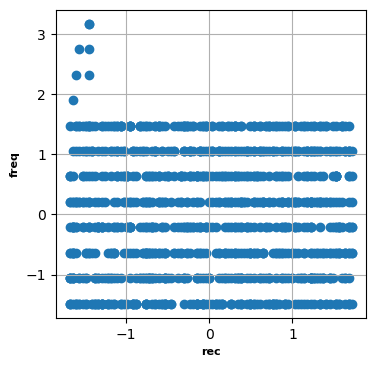

In [ ]:
plt.figure(figsize=[4,4])
plt.scatter(X[:, 0], X[:,1])
plt.xlabel("rec", fontsize = 8, fontweight = 'bold')
plt.ylabel("freq", fontsize = 8, fontweight = 'bold')
plt.grid()
plt.show()

__Podemos verificar que os outliers foram filtrados__
#### Dando continuidade ao exercício, vamos plotar a curva de elbow para termos uma noção da quantidade de clusters que iremos utilizar

C:\Users\guilh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


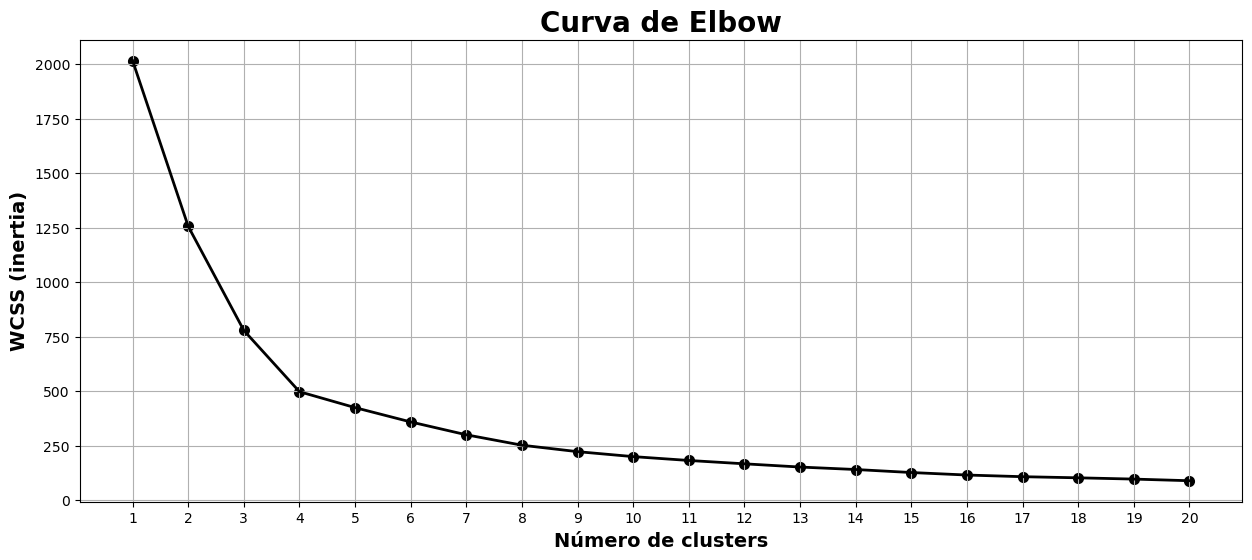

In [ ]:
l=[]
for k in range(1, 21):
    km = KMeans(n_clusters=k)
    km.fit(X)
    l.append(km.inertia_)

plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.xticks(range(1,1+len(l)))
plt.grid()
plt.show()

#### Utilizaremos 4 cluster para nossa classificação.

In [ ]:
km = KMeans(n_clusters=4).fit(X)

In [ ]:
km.cluster_centers_

array([[-0.83583303,  0.92752341],
       [ 0.85460418,  0.80413809],
       [-0.89200896, -0.85728373],
       [ 0.88250271, -0.88563858]])

In [ ]:
dff['grupo'] = km.predict(X)
dff

,rec,freq,grupo
0,15.0,7.0,0
1,51.0,6.0,1
2,80.0,5.0,1
3,38.0,4.0,2
4,19.0,6.0,0
...,...,...,...
1007,50.0,6.0,1
1008,72.0,4.0,3
1009,50.0,5.0,1
1010,81.0,2.0,3


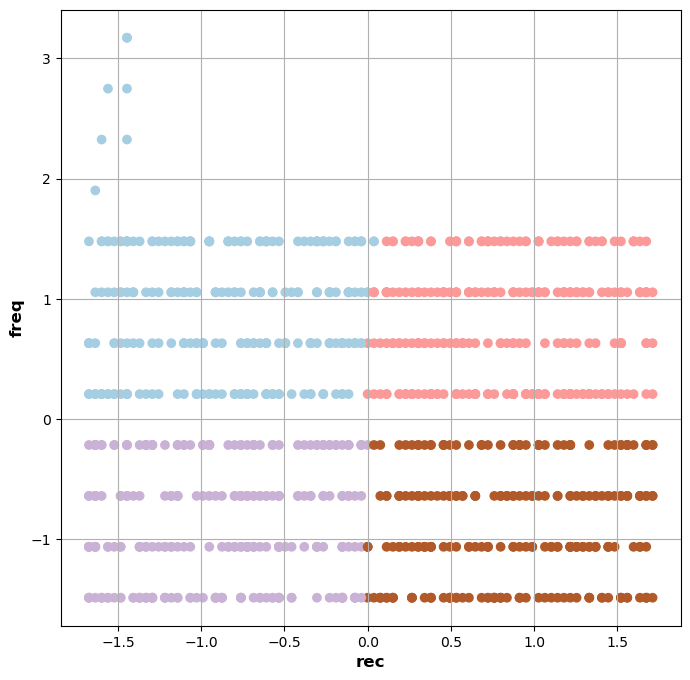

In [ ]:
plt.figure(figsize=[8,8])
plt.scatter(X[:,0], X[:, 1], c = dff.grupo, cmap = plt.cm.Paired)
plt.xlabel("rec", fontsize = 12, fontweight = 'bold')
plt.ylabel("freq", fontsize = 12, fontweight = 'bold')
plt.grid()
plt.show()


### Visualmente os dados parecem estar bem agrupados. Criaremos agora um DataFrame destes grupos com o monetário para comparação

In [ ]:
dfm = pd.concat([dff['grupo'],df['valor']], axis=1)

In [ ]:
dfm

,grupo,valor
0,0,196.881015
1,1,162.408892
2,1,180.158644
3,2,156.048130
4,0,164.052067
...,...,...
1007,1,116.867455
1008,3,94.807854
1009,1,99.187523
1010,3,66.581900


In [ ]:
dfm.groupby(['grupo']).mean()

,valor
grupo,
0,100.369166
1,104.110882
2,105.872189
3,107.905924


#### Podemos inferir que o grupo mais valioso para empresa é o grupo 3 e o menos valioso é o grupo 0

In [ ]:
dff.groupby(by=['grupo']).mean()

,rec,freq
grupo,,
0,23.040650,6.699187
1,67.484615,6.407692
2,21.563707,2.482625
3,68.218107,2.415638


### O grupo mais valioso (3) compreende os clientes com uma média de recência 68 e frequência 2.4, ou seja, clientes cuja última compra fora feita em média a 68 dias e compraram em média 2.4 vezes ao mês.
### Por outro lado, os de menor valor para empresa, são os clientes que compram com maior frequência, seja a menos ou maior tempo da última compra.
### O que faz sentido, pois clientes que compram com maior frequência costumam comprar itens de menor valor.

## Agora faremos a mesma análise utilizando outra técnica de clusterização, o DBSCAN

In [ ]:
db = DBSCAN(eps=0.4, min_samples=35, n_jobs=-1).fit(X)

# Podemos verificar que o parâmetro "eps" é bem sensível.Ele limita a distância entre duas amostras
# para que uma seja considerada vizinha da outra
# aumentando ele para 0.45, temos apenas dois grupos

In [ ]:
db.labels_

array([-1,  0,  1, ...,  1,  5, -1], dtype=int64)

In [ ]:
dff['grupo_db'] = db.fit_predict(X)
dff

,rec,freq,grupo,grupo_db
0,15.0,7.0,0,-1
1,51.0,6.0,1,0
2,80.0,5.0,1,1
3,38.0,4.0,2,-1
4,19.0,6.0,0,-1
...,...,...,...,...
1007,50.0,6.0,1,0
1008,72.0,4.0,3,-1
1009,50.0,5.0,1,1
1010,81.0,2.0,3,5


In [ ]:
dff.grupo_db.value_counts().count()

# temos 8 grupos classificados utilizando os parâmetros definidos acima

8

In [ ]:
df_db = pd.concat([dff['grupo_db'],df['valor'],dff['grupo']], axis=1)
df_db

,grupo_db,valor,grupo
0,-1,196.881015,0
1,0,162.408892,1
2,1,180.158644,1
3,-1,156.048130,2
4,-1,164.052067,0
...,...,...,...
1007,0,116.867455,1
1008,-1,94.807854,3
1009,1,99.187523,1
1010,5,66.581900,3


In [ ]:
df_db.groupby(['grupo_db']).mean()

,valor,grupo
grupo_db,,
-1,103.072183,1.473154
0,94.603009,0.426230
1,113.142045,1.000000
2,111.057042,0.855556
3,89.838824,2.000000
4,117.111456,2.000000
5,100.045157,3.000000
6,113.382963,2.755102


In [ ]:
df_db.groupby(['grupo_db']).valor.mean().sort_values()

grupo_db
 3     89.838824
 0     94.603009
 5    100.045157
-1    103.072183
 2    111.057042
 1    113.142045
 6    113.382963
 4    117.111456
Name: valor, dtype: float64

In [ ]:
mais = dff[dff.grupo_db==4].mean()
menos = dff[dff.grupo_db==3].mean()
print('Mais valioso: \n rec',mais.rec,'\n freq',mais.freq)
print('Menos valioso: \n rec',menos.rec,'\n freq',menos.freq)

Mais valioso: 
 rec 15.482142857142858 
 freq 1.0
Menos valioso: 
 rec 13.6 
 freq 4.0


### Dos cluster criados podemos verificar que o mais valioso é o grupo 4 e o menos valioso é o grupo 3.
### Sendo eles : <br> Mais valioso - o grupo dos clientes com rec 15.5 e freq 1 <br> Menos valioso - o grupo com rec 13.6 e freq 4

### Ou seja, temos a memsa conclusão em ambas as técnicas. Os clientes que compram com mais frequência tem menos valor para a empresa, pois costumam comprar itens de menor valor. Já os clientes que compram com menor frequência tendem a gastar mais a cada compra.

In [ ]:
dff.groupby('grupo_db').mean()

,rec,freq,grupo
grupo_db,,,
-1,41.963087,4.739933,1.473154
0,43.114754,6.000000,0.426230
1,69.041667,5.000000,1.000000
2,64.544444,7.000000,0.855556
3,13.600000,4.000000,2.000000
4,15.482143,1.000000,2.000000
5,73.923077,2.000000,3.000000
6,52.938776,1.000000,2.755102


### Somente a título de curiosidade os dois grupos em questão ( mais e menos valiosos ) se comparando com a técnica utilizada anteriormente (kmeans), fariam parte do mesmo grupo.